In [ ]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('../lab-eda-univariate/amz_uk_price_prediction_dataset.csv')


In [2]:
cbt = pd.crosstab(df["category"],df['isBestSeller'])
cbt['Proportion'] = (cbt[True] / cbt[False]) # proportion of bestsellers for each category (unnormalized)
cbt['Proportion'] = cbt['Proportion'] / cbt['Proportion'].sum()
cbt

isBestSeller,False,True,Proportion
category,,,
3D Printers,247,1,0.002177
3D Printing & Scanning,4065,2,0.000265
Abrasive & Finishing Products,245,5,0.010972
Action Cameras,1696,1,0.000317
Adapters,251,3,0.006426
...,...,...,...
Wind Instruments,243,7,0.015487
Window Treatments,234,5,0.011488
Women,17559,213,0.006522


In [3]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(cbt.iloc[:, :2])
chi2_statistic, chi2_p_value


(np.float64(36540.20270061387), np.float64(0.0))

In [4]:
from scipy.stats.contingency import association
association(cbt.iloc[:, :2], method = "cramer")

0.1222829439760564

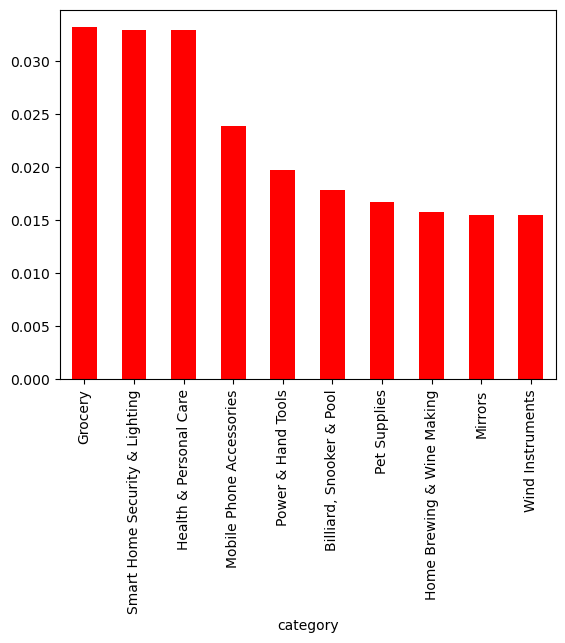

In [5]:
top_categories = cbt["Proportion"].sort_values(ascending=False).head(10)
top_categories.plot(kind = "bar", color = 'red');

In [ ]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [6]:
def tukeys_test_outliers_modified(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return (data >= lower_bound) & (data <= upper_bound)

In [7]:
clean_prices = tukeys_test_outliers_modified(df['price'])
print(len(df))
df = df[clean_prices]
print(len(df))

2443651
2115963


In [8]:
top_20_categories = df['category'].value_counts().sort_values(ascending = False).head(20)
top_20_categories

category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

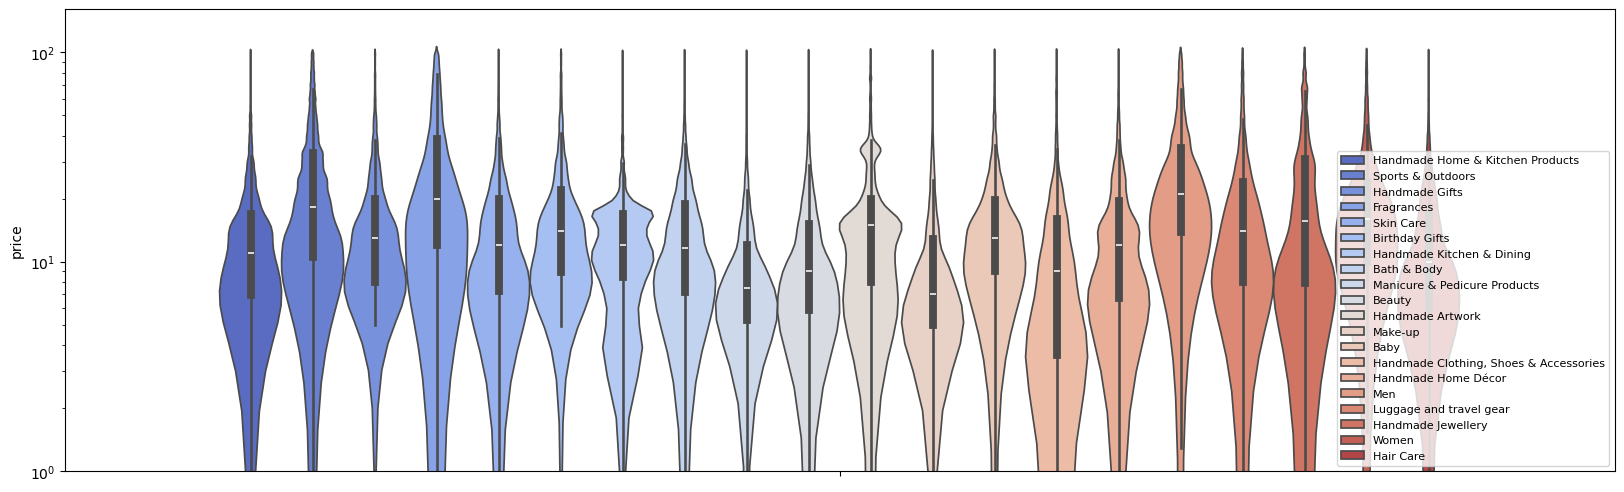

In [13]:
plt.figure(figsize = (20,6))
sns.violinplot(data = df[df['category'].isin(top_20_categories.index) & (df['price'] >= 0.1)], hue = 'category', y = 'price', palette="coolwarm")
plt.yscale('log')
plt.ylim(1e0);
plt.legend(fontsize=8);

In [17]:
top_10_categories = df['category'].value_counts().sort_values(ascending = False).head(10)

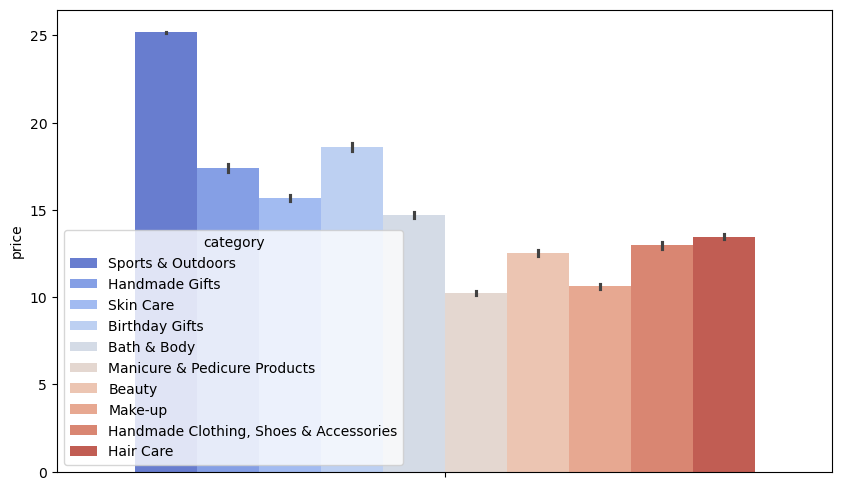

In [18]:

plt.figure(figsize = (10,6))
sns.barplot(data = df[df['category'].isin(top_10_categories.index)], hue = 'category', y = 'price', palette="coolwarm");

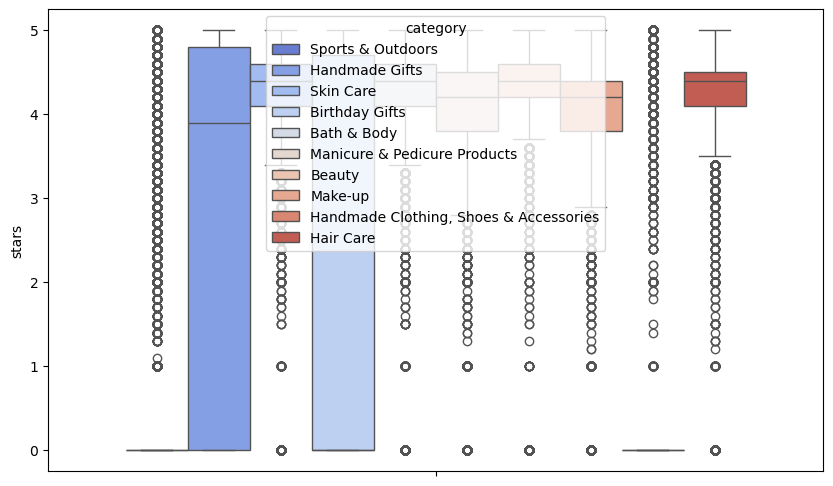

In [19]:

plt.figure(figsize = (10,6))
sns.boxplot(data = df[df['category'].isin(top_10_categories.index)], hue = 'category', y = 'stars', palette="coolwarm");

In [ ]:
# part 3

In [21]:
pearson_correlation = df['price'].corr(df['stars'])
pearson_correlation


np.float64(-0.0776729987818137)

In [22]:

spearman_correlation = df['price'].corr(df['stars'], method='spearman')
spearman_correlation

np.float64(-0.06679697280768314)

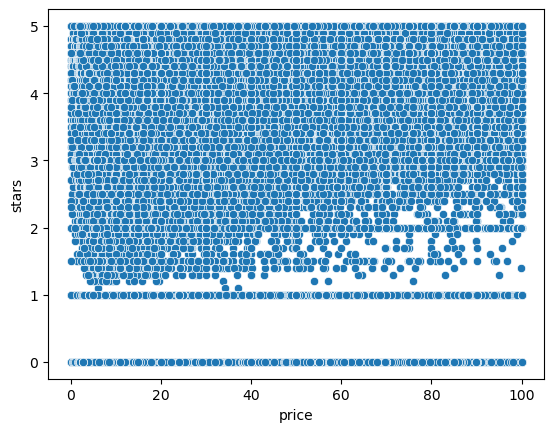

In [23]:
sns.scatterplot(data=df, x='price', y='stars');

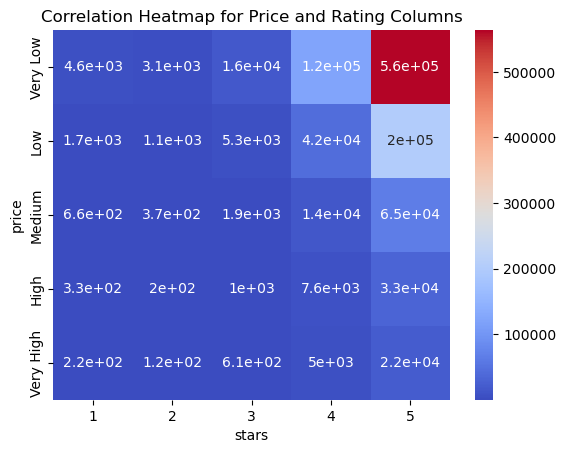

In [24]:
price_bins = pd.cut(df['price'], bins=np.linspace(df['price'].min(), df['price'].max(), 6), labels=["Very Low", "Low", "Medium", "High", "Very High"])
stars_bins = pd.cut(df['stars'], bins=np.linspace(df['stars'].min(), df['stars'].max(), 6), labels=["1", "2", "3", "4", "5"])

correlation_matrix = pd.crosstab(price_bins, stars_bins)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Price and Rating Columns")
plt.show()

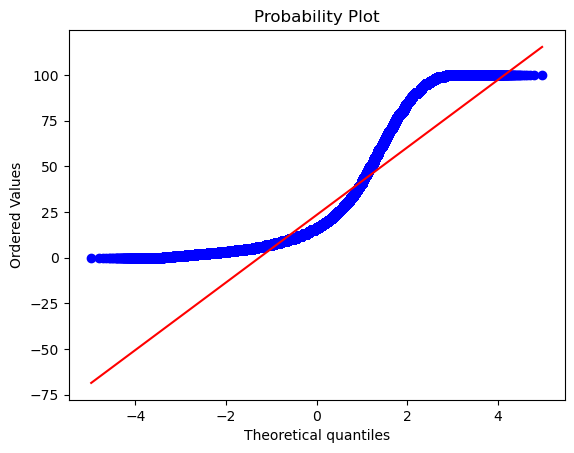

In [25]:
from scipy import stats
stats.probplot(df['price'], plot=plt);